In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


Fashion MNIST 데이터를 로드하고 전처리.

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

입력 데이터(x_train, x_test)의 형태를 (샘플 수, 28, 28, 1)로 reshape.  
-1로 설정하면, 해당 차원의 크기는 자동으로 계산,  
x_train 배열의 원래 크기를 유지하면서 3차원의 배열을 **4차원 배열로 생성**  
(이미지 개수, 28, 28, 1)

x_train = x_train.astype(np.float32) / 255.0  
x_test = x_test.astype(np.float32) / 255.0

np.float32로 형변환 한 뒤 255로 나누어 픽셀 값의 범위를 **0과 1 사이로 정규화**,  
모델의 입력 데이터를 더 잘 학습할 수 있도록.


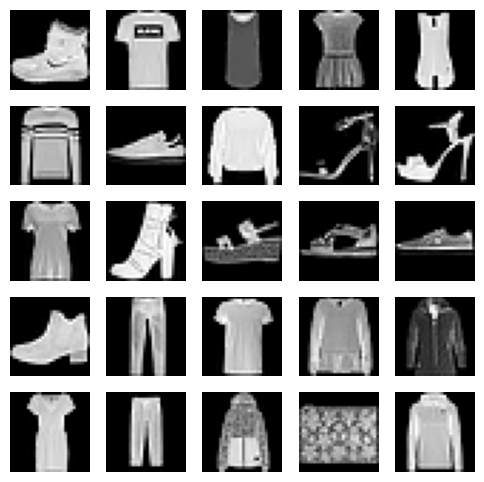

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))

for index in range(25):  # 25개 이미지 출력
    plt.subplot(5, 5, index + 1)  # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    # plt.title(str(t_train[index]))

plt.show()


이미지 확인용으로 총 25개의 이미지를 출력

plt.figure(figsize=(6, 6)) 출력할 그림의 크기를 설정  
figsize는 가로와 세로 크기를 인치 단위로 지정

for index in range(25):  
plt.subplot(5, 5, index + 1) 출력할 그림의 위치를 지정.  
5행 5열의 그리드에서 현재 이미지의 위치를 지정.  
index는 0부터 시작하므로 1을 더해준다.

plt.imshow(x_train[index], cmap='gray')  
현재 인덱스의 이미지를 그레이스케일로 출력.  
x_train[index]는 해당 인덱스의 이미지 데이터를 나타낸다.

plt.axis('off')  
축을 표시하지 않도록 설정하는 부분


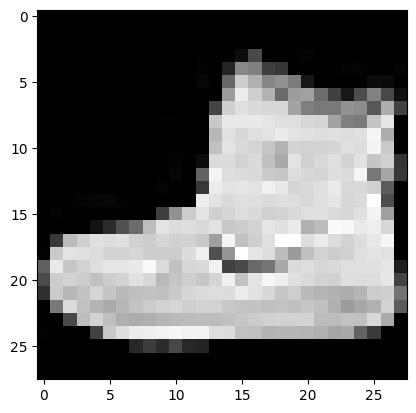

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Fashion MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 첫 번째 이미지 출력
image = x_train[0]
plt.imshow(image, cmap='gray')
plt.show()

# 행렬별 값 출력
for row in image:
    for pixel in row:
        print(f'{pixel:3d}', end=' ')
    print()


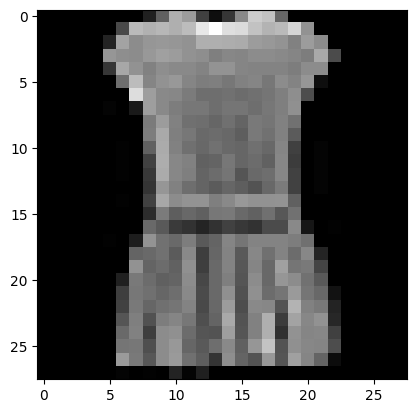

  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0 
  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0 
  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0 
  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0 
  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0 
  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0 
  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 117 129 114   0   0   0   0 

In [5]:
# 네 번째 이미지 출력
image = x_train[3]
plt.imshow(image, cmap='gray')
plt.show()

# 행렬별 값 출력
for row in image:
    for pixel in row:
        print(f'{pixel:3d}', end=' ')
    print()


In [6]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


입력으로부터 특성 추출을 위한 Convolutional 레이어와 pooling 레이어를 거친 후,  
특성 맵을 1차원으로 펼친 뒤  
Fully Connected 레이어를 통해 분류 작업을 수행.  
Softmax 레이어를 통해 클래스별 확률 값을 출력.


cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))  
첫 번째 Convolutional 레이어를 추가.  
입력 형태는 (28, 28, 1)이고, 커널 크기는 (3, 3)이며, 필터 개수는 32개.  
활성화 함수로는 ReLU를 사용.

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))  
두 번째 Convolutional 레이어를 추가.  
커널 크기는 (3, 3)이며, 필터 개수는 64개.  
활성화 함수로는 ReLU를 사용.

cnn.add(MaxPool2D(pool_size=(2,2)))  
Max Pooling 레이어를 추가. 풀 크기는 (2, 2).


cnn.add(Dropout(0.25))  
Dropout 레이어를 추가. 드롭아웃 비율은 0.25.  
학습 중에 일부 뉴런을 무작위로 비활성화하여 과적합을 방지.

cnn.add(Flatten())  
다차원의 특성 맵을 1차원으로 펼치는 Flatten 레이어.

cnn.add(Dense(128, activation='relu'))  
Fully Connected 레이어를 추가. 뉴런 개수는 128개, 활성화 함수로는 ReLU.

cnn.add(Dropout(0.5))  
Dropout 레이어는 학습 중에 각 뉴런을 유지할 확률(keep probability)을 지정.  
비활성화된 뉴런은 역전파 단계에서 그래디언트(gradient)를 전파시키지 않으며,  
이를 통해 학습 중에 다양한 뉴런들이 서로 독립적으로 학습될 수 있다.  
노드의 수는 Dropout 레이어를 통과한 후에도 그대로 유지.  
**단지 학습에 활용되는 뉴런의 일부가 랜덤하게 비활성화.**

cnn.add(Dense(10, activation='softmax'))  
Fully Connected 레이어를 추가. 출력 뉴런 개수는 10개, 활성화 함수로는 Softmax.  
Softmax 함수는 다중 클래스 분류를 위해 확률 값을 출력.


In [7]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

파라미터 수 = (커널 크기 * 커널 크기 * 입력 채널 수 + 1) * 필터 수

● 첫 번째 Conv2D 레이어:
- 커널 크기: 3x3
- 입력 채널 수: 1 (흑백 이미지이므로)
- 커널 별 적용되는 bias: 1
- 필터 수: 32
→ 파라미터 수 = (3 * 3 * 1 + 1) * 32 = 320

● 두 번째 Conv2D 레이어:
- 커널 크기: 3x3
- 입력 채널 수: 32 (이전 레이어 출력 채널 수와 동일)
- 커널 별 적용되는 bias: 1
- 필터 수: 64
→ 파라미터 수 = (3 * 3 * 32 + 1) * 64 = 18496

※ MaxPooling2D / Dropout / Flatten 레이어는 파라미터를 가지지 않으므로 파라미터 수는 0.

● 첫 번째 Dense 레이어: 입력 뉴런 수: 9216 (전체 입력의 크기)/출력 뉴런 수: 128
→ 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수 = (9216 * 128) + 128 = 1179776


파라미터 수 = (커널 크기 * 커널 크기 * 입력 채널 수 + 1) * 필터 수

● 첫 번째 Conv2D 레이어:
- 커널 크기: 3x3
- 입력 채널 수: 1 (흑백 이미지이므로)
- 커널 별 적용되는 bias: 1
- 필터 수: 32
→ 파라미터 수 = (3 * 3 * 1 + 1) * 32 = 320

● 두 번째 Conv2D 레이어:
- 커널 크기: 3x3
- 입력 채널 수: 32 (이전 레이어 출력 채널 수와 동일)
- 커널 별 적용되는 bias: 1
- 필터 수: 64
→ 파라미터 수 = (3 * 3 * 32 + 1) * 64 = 18496

※ MaxPooling2D / Dropout / Flatten 레이어는 파라미터를 가지지 않으므로 파라미터 수는 0.

● 첫 번째 Dense 레이어: 입력 뉴런 수: 9216 (전체 입력의 크기)/출력 뉴런 수: 128
→ 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수 = (9216 * 128) + 128 = 1179776


Output Size of Convolution  
Convolution 연산을 수행한 후의 결과물 크기는  
입력 데이터의 크기, 필터 크기, 패딩의 유무, 스트라이드(stride)의 값에 의해 결정됨.

1. 패딩을 적용하지 않은 경우:  
출력 크기 = (입력 크기 - 필터 크기) / 스트라이드 + 1  
(6-2)/1 + 1 = 5 (5 * 5)

2. 패딩을 적용한 경우:  
출력 크기 = (입력 크기 - 필터 크기 + 2 * 패딩) / 스트라이드 + 1  
(6 - 2 + 2*1)/1 + 1 = 7 (7 * 7)


● 첫 번째 Conv2D 레이어: 입력 이미지의 크기가 28x28x1,  
필터의 크기는 3x3이고 총 32개의 필터를 사용. 출력 크기는  
출력 높이 = (입력 높이 - 필터 높이 + 2 * 패딩) / 스트라이드 + 1  
출력 너비 = (입력 너비 - 필터 너비 + 2 * 패딩) / 스트라이드 + 1  
패딩 값은 0이 되며, 스트라이드 값은 디폴트 값인 1이 적용.  
→ 출력 높이 = (28 - 3 + 0) / 1 + 1 = 26  
→ 출력 너비 = (28 - 3 + 0) / 1 + 1 = 26  
→ 출력 크기 = (None, 26, 26, 32)

● 두 번째 Conv2D 레이어: 입력 이미지의 크기가 (None, 26, 26, 32),  
필터의 크기는 3x3이며 총 64개의 필터를 사용. 출력 크기는  
→ 출력 크기 = (None, 24, 24, 64)

● MaxPooling2D 레이어가 적용되어 출력 크기는 (None, 12, 12, 64)  
→ 출력 높이 = 입력 높이 / 풀링 크기 = 24 / 2 = 12  
→ 출력 너비 = 입력 너비 / 풀링 크기 = 24 / 2 = 12


Flatten 레이어가 적용되어 (None, 9216)의 크기로 변환. (12 * 12 * 64 = 9,216)  
Dense 레이어의 입력 크기가 된다.

따라서, 주어진 예제에서 9216은 Flatten 레이어 이전의 레이어에서의 출력 크기로서,  
Dense 레이어의 입력 크기가 됩니다.

Dropout 레이어는 학습 중에 각 뉴런을 유지할 확률(keep probability)을 지정.

비활성화된 뉴런은 역전파 단계에서 그래디언트(gradient)를 전파시키지 않으며,  
이를 통해 학습 중에 다양한 뉴런들이 서로 독립적으로 학습될 수 있다.

노드의 수는 Dropout 레이어를 통과한 후에도 그대로 유지.  
단지 학습에 활용되는 뉴런의 일부가 랜덤하게 비활성화.


•MaxPooling2D / Dropout / Flatten 레이어는 파라미터를 가지지 않으므로 파라미터 수는 0.

•첫 번째 Dense 레이어:  
- 입력 크기: 9216 (Flatten 이전의 출력 크기)  
   12 * 12 * 64  
- 출력 크기: 128  
- 파라미터 수 = (9216 + 1) * 128 = 1179776

•두 번째 Dropout 레이어는 파라미터를 가지지 않으므로 파라미터 수는 0.

•두 번째 Dense 레이어 (출력 레이어):  
- 입력 크기: 128  
- 출력 크기: 10 (클래스의 수)  
- 파라미터 수 = (128 + 1) * 10 = 1290


cnn.compile() : 주어진 조건으로 모델을 구성하는 모델링 역할  
컴파일 단계에서 모델의 손실 함수(loss function), 옵티마이저(optimizer), 그리고 평가 지표(metrics)를 설정하는 메서드.  
위의 코드에서는 손실 함수를 'sparse_categorical_crossentropy'를 사용하고(정수로 라벨값이 인코딩),  
옵티마이저로는 ‘Adam’을 선택.  
또한 평가 지표로는 ‘accuracy’를 설정.

cnn.summary() : 모델의 구조를 요약하여 출력하는 메서드.  
실행하면 모델의 레이어(layer) 정보와 각 레이어의 출력 형태(output shape) 및 파라미터 개수 등이 표시.  
모델의 구조를 시각적으로 파악할 수 있다.


In [8]:
hist = cnn.fit(x_train, y_train, batch_size=128,
               epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6456 - loss: 4.0997 - val_accuracy: 0.8601 - val_loss: 0.3944
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8337 - loss: 0.4697 - val_accuracy: 0.8864 - val_loss: 0.3210
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8612 - loss: 0.3829 - val_accuracy: 0.8871 - val_loss: 0.3060
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8717 - loss: 0.3534 - val_accuracy: 0.8957 - val_loss: 0.2945
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8844 - loss: 0.3187 - val_accuracy: 0.8939 - val_loss: 0.2901
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8890 - loss: 0.2938 - val_accuracy: 0.8998 - val_loss: 0.2907
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8992 - loss: 0.2730 - val_accuracy: 0.9017 - val_loss: 0.2708
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9036 - loss: 0.2593 - val_accuracy:

hist = cnn.fit(x_train, y_train, batch_size=128,  
               epochs=30, validation_data=(x_test, y_test))  
CNN 모델을 주어진 데이터로 학습하는 과정을 수행.

x_train은 학습 데이터의 입력, y_train은 학습 데이터의 출력(레이블).  
batch_size=128: 한 번의 학습 단계에서 사용되는 샘플의 개수.  
epochs=30: 전체 데이터셋을 몇 번 반복하여 학습할지.  
validation_data=(x_test, y_test): 학습 도중에 검증을 위해 사용되는 데이터.

학습이 진행되면서 손실 함수 값과 정확도 등의 지표가 hist 변수에 저장.  
hist 변수는 학습 과정에서 기록된 지표들을 나타내는 정보를 담고 있다.


In [9]:
cnn.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.2831


[0.2862224578857422, 0.9164000153541565]

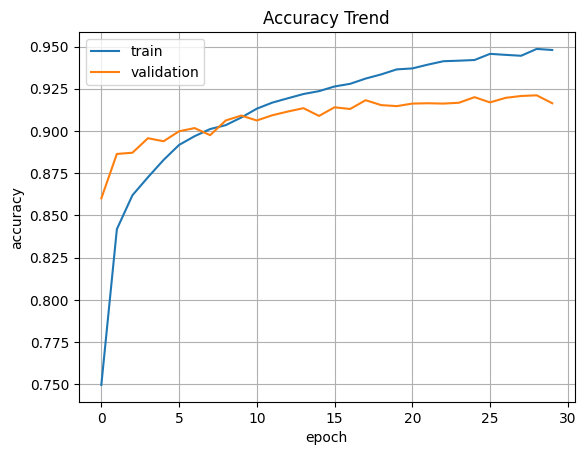

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()


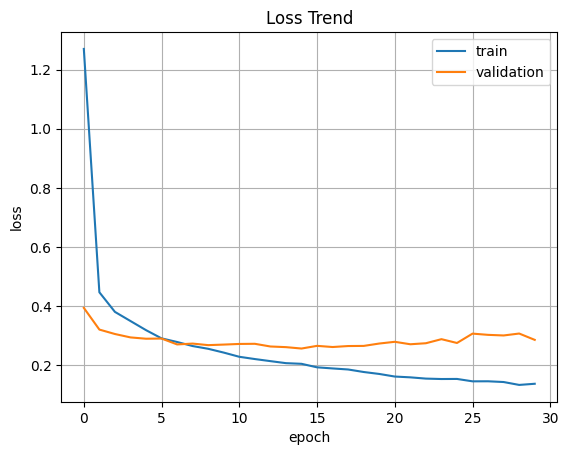

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()
